[Reference](https://preettheman.medium.com/how-to-predict-doge-coin-price-using-machine-learning-and-python-4bc7d723a6d3)

In [1]:
#INSTALL THESE PACKAGES IF NEEDED
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.3MB 4.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=dde344f33efd4ea90047d784da8c6f01deb77d447a8b9bb3b5d4d658a46edf6b
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp37-none-any.whl size=15192 sha256=0799382b14377cb319ade3f3bceaa40737714b4a38e5d8e7499384b4394ecad5
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
import yfinance as yf
from yahoofinancials import YahooFinancials

In [3]:
#CREATING THE DATAFRAME TO STORE DATA
df = yf.download('DOGE-USD',
         start='2021-01-01',
         end='2021-04-01',
         progress=False)

In [5]:
series = df['Close'].values.reshape(-1, 1)

In [6]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [7]:
T = 10
D = 1
X = []
Y = []

In [9]:
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [10]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (81, 10) Y.shape (81,)


In [11]:
class BaselineModel:
  def predict(self, X):
    return X[:,-1] # return the last value for each input sequence

In [12]:
Xtrain, Ytrain = X[:-N//2], Y[:-N//2]
Xtest, Ytest = X[-N//2:], Y[-N//2:]

In [13]:
model = BaselineModel()
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [14]:
Ytrain2 = scaler.inverse_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest2 = scaler.inverse_transform(Ytest.reshape(-1, 1)).flatten()
Ptrain2 = scaler.inverse_transform(Ptrain.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

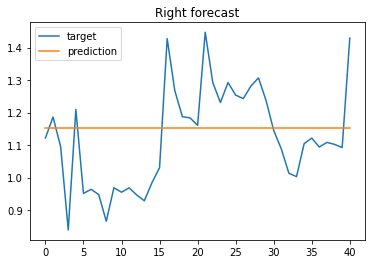

In [15]:
# right forecast
forecast = []
input_ = Xtest[0]
while len(forecast) < len(Ytest):
  f = model.predict(input_.reshape(1, T))[0]
  forecast.append(f)
  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.legend()
plt.title('Right forecast')
plt.show()